NeuralNetwork: input_nodes: 784, hidden_nodes=200, output_nodes=10, lr=0.1
data format: digit 28*28=784 points, data: 7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0

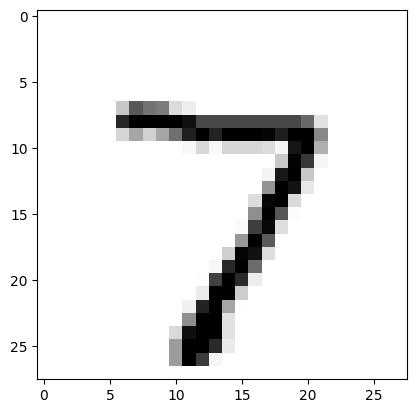

In [50]:
#!pip install scipy
import numpy
import matplotlib.pyplot as plt
import scipy.special

%matplotlib inline

class NeuralNetwork:
    # 初始化神经网络
    def __init__(self, **kwargs):
        # 构建 n 个结点的输入层
        self.input_nodes = int(kwargs.get("input_nodes"))
        # 构建 n 个结点的隐藏层
        self.hidden_nodes = int(kwargs.get("hidden_nodes"))
        # 构建 n 个结点的输出层
        self.output_nodes = int(kwargs.get("output_nodes"))
        # 设置学习率
        self.learning_rate = float(kwargs.get("learning_rate"))
        
        print(f"NeuralNetwork: input_nodes: {self.input_nodes}, hidden_nodes={self.hidden_nodes}, output_nodes={self.output_nodes}, lr={self.learning_rate}")
        # 创建 m*n 的权重矩阵, 数据为 -0.5 到 +0.5 之间的随机值
        #self.wih = numpy.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        #self.who = numpy.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

        # 创建 m*n 的权重矩阵, 数据为正态分布的的权重矩阵, 以 0.0 为分布中心值, 以 3^(-0.5) 为标准方差
        # weight between input layer and hidden layer
        self.wih = numpy.random.normal(0.0, pow(self.hidden_nodes, 0.5), (self.hidden_nodes, self.input_nodes))
        # weight between hidden layer and output layer
        self.who = numpy.random.normal(0.0, pow(self.hidden_nodes, 0.5), (self.output_nodes, self.hidden_nodes))

        # 设置激活函数
        self.activation_function = lambda x: scipy.special.expit(x)

    # 训练神经网络
    def train(self, input_list, target_list):
        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # 计算误差 target - actual
        output_errors = targets - final_outputs
        # 隐藏层的误差 hidder_errors 可由权重 output_errors 经权重 who 进行分割得出 
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # 更新隐藏层与输出层之间的权重
        self.who += self.learning_rate * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 更新输入层与隐藏层之间的权重
        self.wih += self.learning_rate * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    # 查询神经网络, 接收输入, 产生输出
    def query(self, input_list):
        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


def load_data(data_file, count=0):
    data_list = []
    line_num = 0
    with open(data_file, 'r', newline='', encoding='utf-8') as fp:
        for line in fp:
            data_list.append(line)
            line_num += 1
            if count > 0 and line_num >= count:
                break
    return data_list
    

def train(nn, training_data_list, output_nodes):
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            nn.train(inputs, targets)

def test(nn, test_data_list):
    scorecard = []
    loop_num = 0
    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = nn.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        if loop_num == 0:
            draw_digit(record)
            print(f"infer to {label} from {outputs}")
        # append correct or incorrect to list
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            
        loop_num += 1

    return scorecard
    
def draw_digit(data):
    print(f"data format: digit 28*28=784 points, data: {data}")
    values = data.split(',')
    image_array = numpy.asfarray(values[1:]).reshape(28, 28)
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    
if __name__ == '__main__':

    nn = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.1)
    data_count = 1000
    # load the mnist training data CSV file into a list - 60000 titakt
    training_data_list = load_data("mnist_train.csv", data_count)
    
    train(nn, training_data_list, 10)

    # load the mnist test data CSV file into a list - 10000 totally
    test_data_list = load_data("mnist_test.csv", data_count)
    
    scorecard = test(nn, test_data_list)
    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    print ("performance = ", scorecard_array.sum() / scorecard_array.size)
